In [20]:

from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, concatenate, GlobalAveragePooling2D, Dropout,BatchNormalization
from keras.losses import CategoricalCrossentropy
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.utils import to_categorical
!pip install np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import keras
import keras.utils
from keras import utils as np_utils
from keras.layers import Dense, Activation, Flatten

In [21]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
num = 10
print(x_train.shape)
print(x_test.shape)
print(f'  Train _Shape:{x_train.shape}    lb:{y_train.shape}')
print(f'  Test_Shape:{x_test.shape}    lb:{y_test.shape}')

(50000, 32, 32, 3)
(10000, 32, 32, 3)
  train:(50000, 32, 32, 3)    lb:(50000, 1)
  test:(10000, 32, 32, 3)    lb:(10000, 1)


In [22]:
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

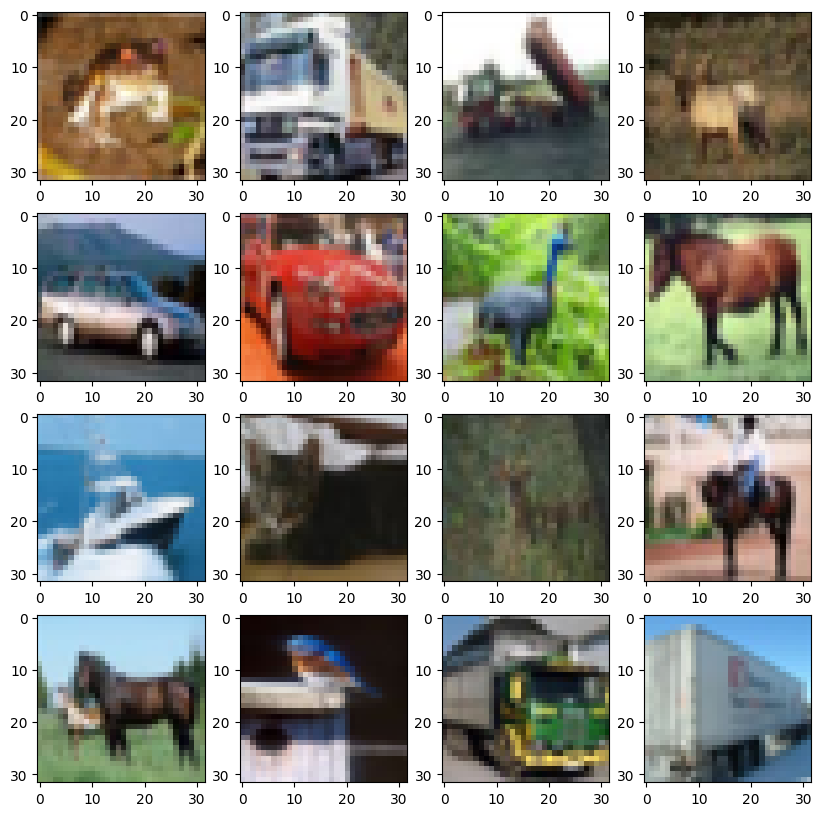

In [17]:
#16 img with size 10 10 in data set
fig = plt.figure(figsize=(10, 10))
for i in range(16):
  img, lb= x_train[i], y_train[i]
  j=i+1
  fig.add_subplot(4, 4, j)
  plt.imshow(img)



In [23]:
def inception_module(x):
    Conv11 = Conv2D(64, (1,1), padding='same', activation='relu')(x)
    Conv33 = Conv2D(32, (1,1), padding='same', activation='relu')(x)
    Conv33 = Conv2D(64, (3,3), padding='same', activation='relu')(Conv33)
    Conv55 = Conv2D(32, (1,1), padding='same', activation='relu')(x)
    Conv55 = Conv2D(64, (5,5), padding='same', activation='relu')(Conv55)
    MaxPool = MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    MaxPool = Conv2D(64, (1,1), padding='same', activation='relu')(MaxPool)
    output_inception = concatenate([Conv11, Conv33, Conv55, MaxPool], axis=3)

    return output_inception

In [24]:
input_layer = Input(shape=(32, 32, 3))
layer = Conv2D(32, (3,3), padding='same', activation='relu')(input_layer)
layer = Conv2D(64, (3,3), padding='same', activation='relu')(layer)
layer = Conv2D(32, (3,3), padding='same', activation='relu')(layer)
layer= MaxPooling2D(pool_size=(2, 2))(layer)
layer= inception_module(layer)
layer = Conv2D(128, (3,3), padding='same', activation='relu')(layer)
layer = Conv2D(256, (3,3), padding='same', activation='relu')(layer)
layer = Flatten()(layer)
output_layer = Dense(10, activation='softmax')(layer)

model = Model(inputs=input_layer, outputs=output_layer)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_10 (Conv2D)          (None, 32, 32, 32)           896       ['input_2[0][0]']             
                                                                                                  
 conv2d_11 (Conv2D)          (None, 32, 32, 64)           18496     ['conv2d_10[0][0]']           
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)           0         ['conv2d_11[0][0]']           
 g2D)                                                                                         

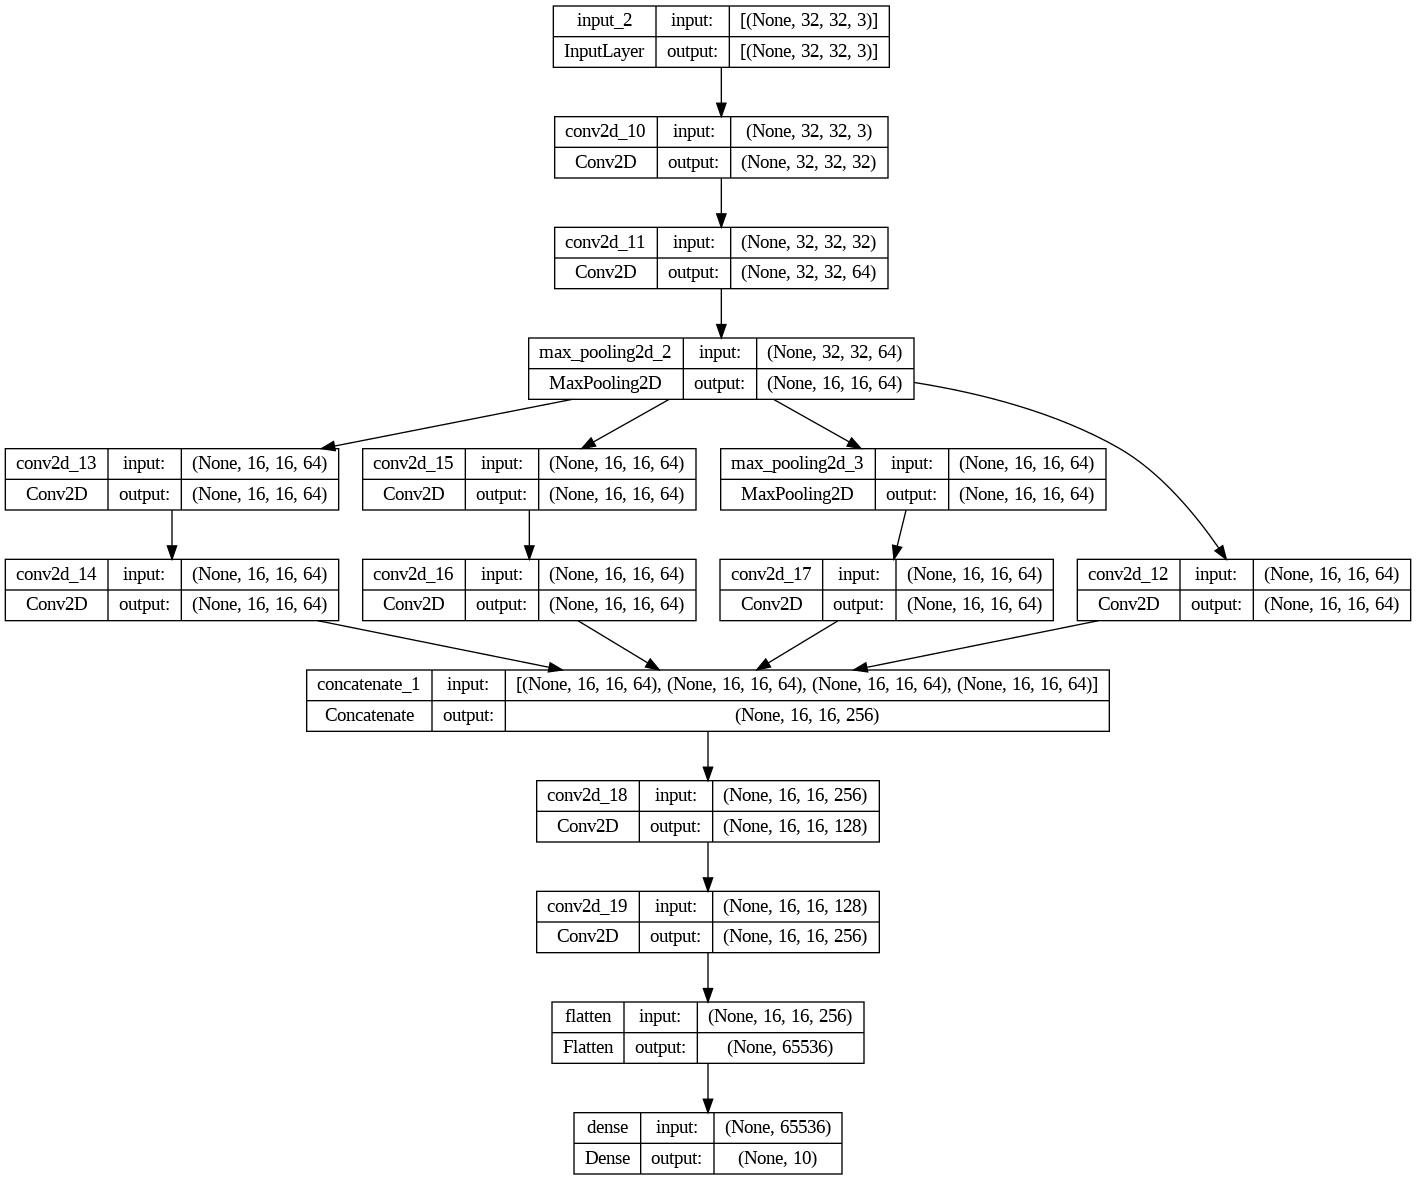

In [26]:
import tensorflow as tf
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 1500s 2s/step - loss: 1.3668 - accuracy: 0.5086 - val_loss: 1.0568 - val_accuracy: 0.6281
Epoch 2/10
782/782 [==============================] - 1468s 2s/step - loss: 0.9428 - accuracy: 0.6701 - val_loss: 0.8896 - val_accuracy: 0.6865
Epoch 3/10
782/782 [==============================] - 1563s 2s/step - loss: 0.7603 - accuracy: 0.7376 - val_loss: 0.7905 - val_accuracy: 0.7257
Epoch 4/10
782/782 [==============================] - 1481s 2s/step - loss: 0.6302 - accuracy: 0.7822 - val_loss: 0.7435 - val_accuracy: 0.7407
Epoch 5/10
782/782 [==============================] - 1468s 2s/step - loss: 0.5209 - accuracy: 0.8182 - val_loss: 0.7669 - val_accuracy: 0.7568
Epoch 6/10
782/782 [==============================] - 1462s 2s/step - loss: 0.4172 - accuracy: 0.8533 - val_loss: 0.8180 - val_accuracy: 0.7465
Epoch 7/10
782/782 [==============================] - 1465s 2s/step - loss: 0.3256 - accuracy: 0.8856 - val_loss: 0.8400 - val_accuracy:

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
# plot training and test loss
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color ='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color ='black')
plt.title('LOSS FOR MODEL TRAIN AND VALIDATION')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plot training and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy' , color ='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy' , color ='black')
plt.title('ACCURACY FOR MODEL TRAIN AND VALIDATION')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
